[1 2 8 4 8 7 6 4 5 9]


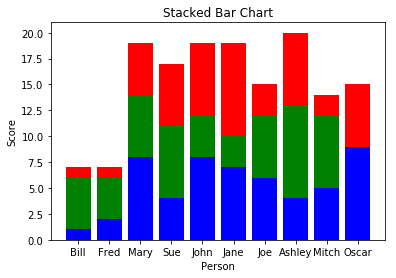

In [18]:
#Example code taken from open ai for barplots

import matplotlib.pyplot as plt
import numpy as np
# data
x = np.arange(10)
y1 = np.random.randint(10, size=10)
y2 = np.random.randint(10, size=10)
y3 = np.random.randint(10, size=10)
print(y1)
# plot
plt.bar(x, y1, color='b')
plt.bar(x, y2, color='g', bottom=y1)
plt.bar(x, y3, color='r', bottom=y1+y2)
# labels
plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue', 'John', 'Jane', 'Joe', 'Ashley', 'Mitch', 'Oscar'))
plt.title('Stacked Bar Chart')
plt.xlabel('Person')
plt.ylabel('Score')
# show
plt.show()

In [82]:
# Example dataframe for set up 
import pandas as pd

# intialise data of lists.
data = {'samples':['CMB_1', 'CMB_1', 'LM_1', 'LM_1'],
        'paired_end':['R1', 'R2', 'R1', 'R2'],
        'strain_1':[0, 1, 1, 1],
        'strain_2':[1, 0, 1, 0],
        'strain_3':[0, 1, 0, 1],
        'strain_4':[1, 1, 1, 1],
        'strain_5':[1, 1, 1, 0],
        'strain_6':[1, 1, 1, 1],
        'strain_7':[0, 1, 1, 1],
        'strain_8':[1, 1, 1, 1]}
 
df = pd.DataFrame(data)

# shift column 'Name' to first position
first_column = df.pop('samples')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'samples', first_column)

df.head()

,samples,paired_end,strain_1,strain_2,strain_3,strain_4,strain_5,strain_6,strain_7,strain_8
0,CMB_1,R1,0,1,0,1,1,1,0,1
1,CMB_1,R2,1,0,1,1,1,1,1,1
2,LM_1,R1,1,1,0,1,1,1,1,1
3,LM_1,R2,1,0,1,1,0,1,1,1


In [83]:
for samplo in df.samples.unique():
    print(samplo)

CMB_1
LM_1


In [86]:
def VDBarChart(df):
    R1_list = []
    R2_list = []
    bar_chart_counter = 1
    for sample in df.samples.unique():
        df1 = df[df['samples'] == sample]
        #print(df1.head())
        df2 = df1[df1['paired_end'] == 'R1']
        #print(df2.head())
        for (columnName, columnData) in df2.iteritems():
            if columnName == 'samples' or columnName == 'paired_end':
                None
            else:
                R1_list.append(columnData.values[0])
        df3 = df1[df1['paired_end'] == 'R2']
        for (columnName, columnData) in df3.iteritems():
            if columnName == 'samples' or columnName == 'paired_end':
                None
            else:
                R2_list.append(columnData.values[0])

        a = 0 #is only in R1_list
        b = 0 #is in both lists
        c = 0 #is only in R2_list

        for i in range(len(R1_list)):   
            x = R1_list[i] - R2_list[i]
            if x == -1:
                c += 1
            elif x == 1:
                a += 1
            elif x == 0 and R1_list[i] == 1:
                b += 1

        #print(a, b, c)            
        #print(R1_list)
        #print(R2_list)
        if bar_chart_counter == 1:
            plt.bar(bar_chart_counter, a, color='b', label = 'R1')
            plt.bar(bar_chart_counter, b, color='g', bottom=a, label = 'Both')
            plt.bar(bar_chart_counter, c, color='y', bottom=a + b, label = 'R2')
        else:
            plt.bar(bar_chart_counter, a, color='b')
            plt.bar(bar_chart_counter, b, color='g', bottom=a)
            plt.bar(bar_chart_counter, c, color='y', bottom=a + b)
        plt.legend()
        bar_chart_counter += 1
    plt.show()

In [88]:
df.head()

,samples,paired_end,strain_1,strain_2,strain_3,strain_4,strain_5,strain_6,strain_7,strain_8
0,CMB_1,R1,0,1,0,1,1,1,0,1
1,CMB_1,R2,1,0,1,1,1,1,1,1
2,LM_1,R1,1,1,0,1,1,1,1,1
3,LM_1,R2,1,0,1,1,0,1,1,1


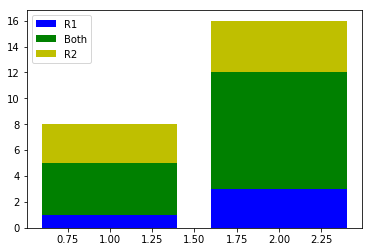

In [87]:
VDBarChart(df)